# *Laboratory of Computational Physics A.Y 2021/2022 Final Project : Analysis of Vodafone Users' fluxes*
### MSc Physics of Data
### University of Padua
### Authors: Ausilio Lorenzo, Jafarpour Farshad, Abdennia Atyie, Ghaffari Shabnaz

## Importing needed libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from bokeh.io import curdoc, output_notebook, show
from bokeh.models import HoverTool, WheelZoomTool, BoxZoomTool, ResetTool, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.plotting import figure
from IPython.display import Image
import matplotlib
matplotlib.style.use('fivethirtyeight') 


## Data Preparation

In [29]:
#importing day_od.csv 

file_name1='datafile/day_od.csv'
day_od=pd.read_csv(file_name1, encoding='utf16')
day_od.head()

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136


In [30]:
#importing distinct_users_day.csv

file_name2='datafile/distinct_users_day.csv'
distinct_users_day=pd.read_csv(file_name2, encoding="latin-1")
distinct_users_day.head()

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512


In [31]:
#importing codici_istat_comune.csv 

file_name3='datafile/codici_istat_comune.csv'
codici_comune=pd.read_csv(file_name3, encoding="latin-1")
codici_comune.head()

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0


In [32]:
#importing codici_istat_provincia.csv

file_name4='datafile/codici_istat_provincia.csv'
codici_provincia=pd.read_csv(file_name4, encoding='latin-1')
codici_provincia=pd.DataFrame(codici_provincia)
codici_provincia.head()

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT


In [33]:
#importing codici_nazioni.csv

file_name5='datafile/codici_nazioni.csv'
codici_nazioni=pd.read_csv(file_name5, encoding='utf16')
codici_nazioni.head()

,COD_COUNTRY,COUNTRY_NAME_IT
0,212,Monaco
1,219,Croazia
2,226,Romania
3,238,Danimarca
4,246,Lituania


In [34]:
#importing inhabitant.txt

file_name6='datafile/inhabitant.txt'
f=pd.read_csv(file_name6, delimiter='\t', header=None, quoting=0, error_bad_lines=False, encoding='latin-1')
h=['PROVINCIA', 'residents']
inhabitants=pd.DataFrame(f)
inhabitants = inhabitants.set_axis(['PROVINCIA', 'RESIDENTS'], axis=1, inplace=False)
inhabitants.head()

C:\Users\loren\AppData\Local\Temp\ipykernel_27540\3319029182.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  f=pd.read_csv(file_name6, delimiter='\t', header=None, quoting=0, error_bad_lines=False, encoding='latin-1')
Skipping line 22: expected 2 fields, saw 3

C:\Users\loren\AppData\Local\Temp\ipykernel_27540\3319029182.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  inhabitants = inhabitants.set_axis(['PROVINCIA', 'RESIDENTS'], axis=1, inplace=False)


,PROVINCIA,RESIDENTS
0,Torino,2269120.0
1,Vercelli,172307.0
2,Novara,369595.0
3,Cuneo,588559.0
4,Asti,215884.0


# Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors

In [54]:
visitor_foreigner=distinct_users_day[distinct_users_day['CUST_CLASS'] == 'foreigner'].merge(codici_nazioni, on='COD_COUNTRY')

sorted_countries= visitor_foreigner.groupby(['COUNTRY_NAME_IT'])['VISITORS'].sum().sort_values(ascending=False)
print(sorted_countries.head())

sorted_countries.to_csv('datafile/sorted_countries.csv')


COUNTRY_NAME_IT
Francia     129672
Svizzera    116884
Germania    109176
Cina        107796
Austria      96776
Name: VISITORS, dtype: int64


# Reading GeoMap

In [37]:
shapefile ='datafile/worldmap.shx'

geo_df = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
#Removing Antarctica from the map
geo_df.drop(index=geo_df.loc[geo_df['country'] == 'Antarctica'].index, inplace=True)

# Create Translation DataFrame

In [39]:
eng_country_names = pd.read_csv('datafile/countries_english.csv')
ita_country_names = pd.read_csv('datafile/countries_italian.csv')
translate_df = ita_country_names.merge(eng_country_names,
                                       left_on='alpha3', 
                                       right_on='alpha3',
                                       how='left',
                                       suffixes=('_ita', '_eng'))
translate_df = translate_df[['alpha3', 'name_ita', 'name_eng']]
translate_df.head()

,alpha3,name_ita,name_eng
0,afg,Afghanistan,Afghanistan
1,alb,Albania,Albania
2,dza,Algeria,Algeria
3,and,Andorra,Andorra
4,ago,Angola,Angola


# Read data and translate

In [40]:
visitor_df = pd.read_csv('datafile/sorted_countries.csv')
visitor_df = visitor_df.merge(translate_df,
                              left_on='COUNTRY_NAME_IT',
                              right_on='name_ita',
                              how='outer')

visitor_df = visitor_df[['name_ita', 'name_eng', 'alpha3', 'VISITORS']]
visitor_df.rename(columns={'name_ita': 'Country_name_ita',
                           'name_eng': 'Country_name_eng',
                           'VISITORS': 'Visitors'}, 
                  inplace=True)
visitor_df['alpha3'] = visitor_df['alpha3'].apply(lambda x: x.upper())
visitor_df.head()

,Country_name_ita,Country_name_eng,alpha3,Visitors
0,Francia,France,FRA,129672.0
1,Svizzera,Switzerland,CHE,116884.0
2,Germania,Germany,DEU,109176.0
3,Cina,China,CHN,107796.0
4,Austria,Austria,AUT,96776.0


# Merge visitors data with GeoMap

In [41]:
geo_visitor = geo_df.merge(visitor_df, left_on='country_code', right_on='alpha3', how='left')
geo_visitor = geo_visitor[['Country_name_ita', 'Country_name_eng', 'country_code', 'geometry', 'Visitors']]
geo_visitor['logarithm_Visitors'] = np.log10(geo_visitor['Visitors'])
geo_visitor['Visitors'].fillna(0, inplace=True)
geo_visitor.head()

,Country_name_ita,Country_name_eng,country_code,geometry,Visitors,logarithm_Visitors
0,Figi,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,NaN
1,Tanzania,"Tanzania, United Republic of",TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,NaN
2,NaN,NaN,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,NaN
3,Canada,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",8560.0,3.932474
4,Stati Uniti d'America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",76136.0,4.881590


# Plot the GeoMap with visitors layout

In [ ]:
from bokeh.models.mappers import LogColorMapper

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson=geo_visitor.to_json())

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
palette = palette[::-1]

#Add hover tool
hover = HoverTool(tooltips=[('Country (Ita)','@Country_name_ita'),
                            ('Country (Eng)','@Country_name_eng'),
                            ('Country code','@country_code'),
                            ('Visitors', '@Visitors')])

log_mapper = LinearColorMapper(palette=palette,
                                 low=geo_visitor.logarithm_Visitors.min(),
                                 high=geo_visitor.logarithm_Visitors.max(),
                                 nan_color='#ffffff')


#Create color bar. 
color_bar = ColorBar(color_mapper=log_mapper,
                     label_standoff=8,
                     width=20,
                     height=500,
                     border_line_color=None,
                     location=(0,0),
                     orientation='vertical',
                      )

#Create figure object.
p = figure(title = 'World map based on number of visitors', 
           plot_height=600, 
           plot_width=950, 
           toolbar_location='above', 
           tools=[hover, WheelZoomTool(), BoxZoomTool(), ResetTool()])

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', 
          source=geosource,
          fill_color={'field':'logarithm_Visitors','transform':log_mapper},
          line_color='black',
          line_width=0.25,
          fill_alpha=1)

p.add_layout(color_bar, 'right')

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(p)

# Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.

Text(0, 0.5, 'Wieghted Flow')

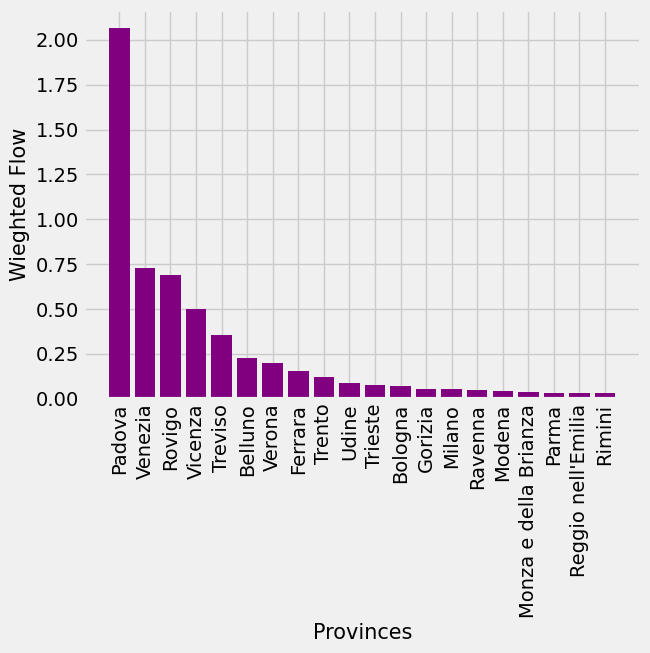

In [56]:
visitor_italian=distinct_users_day[(distinct_users_day['CUST_CLASS'] == 'visitor')].merge(codici_provincia, on='COD_PRO')
visitor_italian


sorted_provinces= visitor_italian.groupby(['PROVINCIA', 'COD_PRO'], as_index=False)['VISITORS'].sum().sort_values(by=['VISITORS'], ascending=False)
sorted_provinces=sorted_provinces.reset_index(drop=True)
sorted_provinces


norm=sorted_provinces.merge(inhabitants, on='PROVINCIA')
norm['weighted']=norm['VISITORS']/norm['RESIDENTS']
sorted_norm=norm.sort_values(by=['weighted'], ascending=False)

sorted_norm.to_csv('datafile/cities.csv')

plt.bar(sorted_norm.iloc[:20, 0], sorted_norm.iloc[:20, 4], color=['purple'])
plt.xticks(rotation='vertical')
plt.xlabel('Provinces', fontsize=15)
plt.ylabel('Wieghted Flow', fontsize=15)


# Reading Italy GeoMap

In [57]:
shapefile ='datafile/ITA_ADM2.shx'

geo_df = gpd.read_file(shapefile)[['Name', 'ISO_Code', 'geometry']]
geo_df.columns = ['Province', 'code', 'geometry']
geo_df.head()

,Province,code,geometry
0,Torino,IT-TO,"POLYGON ((7.85904 45.59758, 7.85976 45.59723, ..."
1,Vercelli,IT-VC,"POLYGON ((8.19874 45.94993, 8.19893 45.94988, ..."
2,Novara,IT-NO,"POLYGON ((8.47365 45.86742, 8.47410 45.86716, ..."
3,Cuneo,IT-CN,"MULTIPOLYGON (((7.97088 44.85254, 7.97135 44.8..."
4,Asti,IT-AT,"POLYGON ((8.02884 45.13272, 8.02895 45.13270, ..."


# Reading Weight of Visitors data

In [58]:
visitor_df = sorted_norm
visitor_df = visitor_df[['PROVINCIA','weighted']]
visitor_df.head()

,PROVINCIA,weighted
0,Padova,2.063215
1,Venezia,0.726653
6,Rovigo,0.691472
2,Vicenza,0.500405
3,Treviso,0.357468


# Merge visitors data with GeoMap

In [59]:
geo_visitor = geo_df.merge(visitor_df, left_on='Province', right_on='PROVINCIA', how='left')
geo_visitor = geo_visitor[['Province', 'weighted', 'geometry']]
geo_visitor['logarithm_weighted'] = np.log2(geo_visitor['weighted'])
geo_visitor['weighted'].fillna(0, inplace=True)
geo_visitor.head()

,Province,weighted,geometry,logarithm_weighted
0,Torino,0.017217,"POLYGON ((7.85904 45.59758, 7.85976 45.59723, ...",-5.860002
1,Vercelli,0.011259,"POLYGON ((8.19874 45.94993, 8.19893 45.94988, ...",-6.472781
2,Novara,0.024795,"POLYGON ((8.47365 45.86742, 8.47410 45.86716, ...",-5.333824
3,Cuneo,0.005729,"MULTIPOLYGON (((7.97088 44.85254, 7.97135 44.8...",-7.447439
4,Asti,0.006670,"POLYGON ((8.02884 45.13272, 8.02895 45.13270, ...",-7.228044


# Plot the GeoMap with visitors layout

In [ ]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson=geo_visitor.to_json())

#Define a sequential multi-hue color palette.
palette = brewer['Reds'][8]
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette=palette,
                                 low=geo_visitor.logarithm_weighted.min(),
                                 high=geo_visitor.logarithm_weighted.max(),
                                 nan_color='#ffffff')

#Add hover tool
hover = HoverTool(tooltips=[('Province','@Province'),
                            ('Weight', '@weighted')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=8,
                     width=20,
                     height=500,
                     border_line_color=None,
                     location=(0,0),
                     orientation='vertical',
                     )


#Create figure object.
p = figure(title = 'Italy map based on weight of visitors', 
           plot_height=600, 
           plot_width=950, 
           toolbar_location='above', 
           tools=[hover, WheelZoomTool(), BoxZoomTool(), ResetTool()])

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', 
          source=geosource,
          fill_color={'field':'logarithm_weighted','transform':color_mapper},
          line_color='black',
          line_width=0.25,
          fill_alpha=1)

p.add_layout(color_bar, 'right')

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(p)

# Study of the visitors' fluxes

In [61]:
captal_city=['Milano', 'Bologna', 'Trieste']
near_regions=['Lombardia', 'Emilia Romagna', 'Friuli Venezia Giulia']

mid_range_data=pd.DataFrame(index=near_regions, columns=['FLOW'])

def regions(captal_city, near_regions):
    
    reg_c=int(codici_provincia[codici_provincia['PROVINCIA']== captal_city]['COD_REG'])
    df1=codici_provincia[codici_provincia['COD_REG'] == reg_c].merge(day_od, on='COD_PRO')
    df2=df1.groupby(df1['COD_REG'], as_index=False)['FLOW'].sum()
    mid_range_data.loc[near_regions, 'FLOW']=df2.loc[0, 'FLOW']
     
    return df1

for i in range(len(captal_city)):
    regions(captal_city[i], near_regions[i])

In [62]:
mid_range_data

,FLOW
Lombardia,186815
Emilia Romagna,89346
Friuli Venezia Giulia,80930


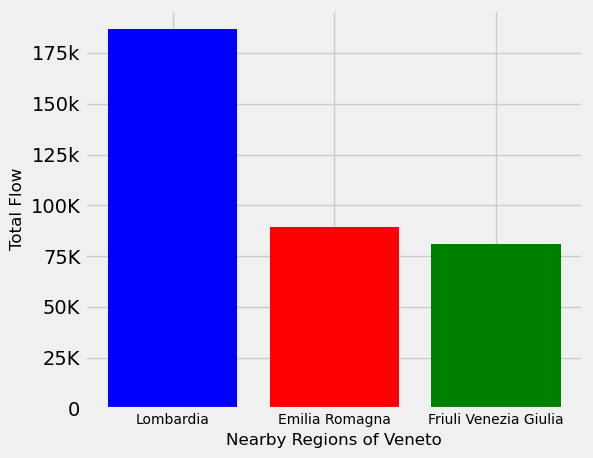

In [63]:
plt.bar(near_regions, mid_range_data['FLOW'], color = ['b', 'r', 'g'])
plt.xticks(rotation='horizontal', fontsize=10)
plt.xlabel('Nearby Regions of Veneto', fontsize=12)
plt.ylabel('Total Flow', fontsize=12)
plt.tight_layout()
plt.yticks([0,25000,50000,75000,100000,125000,150000,175000], 
           ["0", "25K", "50K", "75K", "100K", "125k","150k","175k"])
plt.show()

Finding mostly contributing provinces for each regions:

In [64]:
#function to find the mostly conributed provinces in each region

def find_Max_pros(cap, reg, n):
    max_pros=regions(cap, reg).groupby(['PROVINCIA', 'COD_PRO'], as_index=False)['FLOW'].sum().sort_values(by=['FLOW'],ascending=False)
    max_n_pros= max_pros.iloc[:n].reset_index(drop=True)
    return max_n_pros


Lombardia_Max_provinces=find_Max_pros('Milano', 'Lombardia', 3)
EmiliaRomagna_Max_provinces=find_Max_pros('Bologna','Emilia Romagna', 3)
Venezia_Max_provinces=find_Max_pros('Trieste', 'Friuli Venezia Giulia', 3)

Lombardia_Max_provinces

,PROVINCIA,COD_PRO,FLOW
0,Milano,15,114550
1,Brescia,17,20032
2,Mantova,20,18611


Daily Analysis:

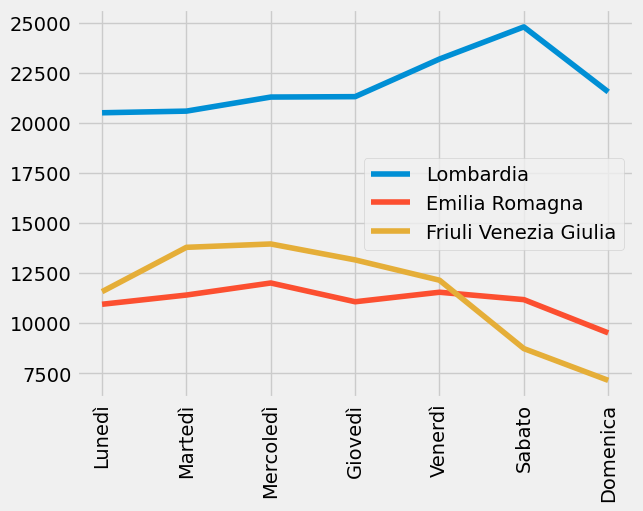

In [65]:
#function for daily analysis for each region

def daily_analysis(df):
    max_provinces=df.iloc[:3]['COD_PRO']
    max_provinces=dict(max_provinces)
    daily_max=day_od[day_od['COD_PRO'].isin(max_provinces.values())]
    daily_max=daily_max.groupby(['DOW'], as_index=False)['FLOW'].sum()
    #sorting days of week
    days = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica']
    daily_max['DOW']=pd.Categorical(daily_max['DOW'], categories=days, ordered=True)
    dataset_days=daily_max.sort_values(['DOW'], ignore_index=True)
    return dataset_days

cap=['Milano', 'Bologna', 'Trieste']
reg=['Lombardia', 'Emilia Romagna', 'Friuli Venezia Giulia']

#Dictionary with dataframes for each region with the sum of fluxes based on the day of the week
daily_flow={}
for i in range(len(reg)):
        daily_flow[reg[i]]=daily_analysis(find_Max_pros(cap[i], reg[i], 3))
        
plt.plot(daily_flow['Lombardia']['DOW'], daily_flow['Lombardia']['FLOW'], label='Lombardia')
plt.plot(daily_flow['Emilia Romagna']['DOW'], daily_flow['Emilia Romagna']['FLOW'], label='Emilia Romagna')
plt.plot(daily_flow['Friuli Venezia Giulia']['DOW'], daily_flow['Friuli Venezia Giulia']['FLOW'], label='Friuli Venezia Giulia')
plt.legend(loc='best')
plt.xticks(rotation='vertical')

plt.show()


In [66]:
#function to differ data from weekend and weekdays

weekdays =['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì']
weekend = ['Sabato', 'Domenica']

def data_week(df, w):
    if w=='y':
        w=weekdays
    else:
        w=weekend
    df_weekend=df[df['DOW'].isin(w)]
    df_weekend=df_weekend['FLOW'].sum()
    return df_weekend



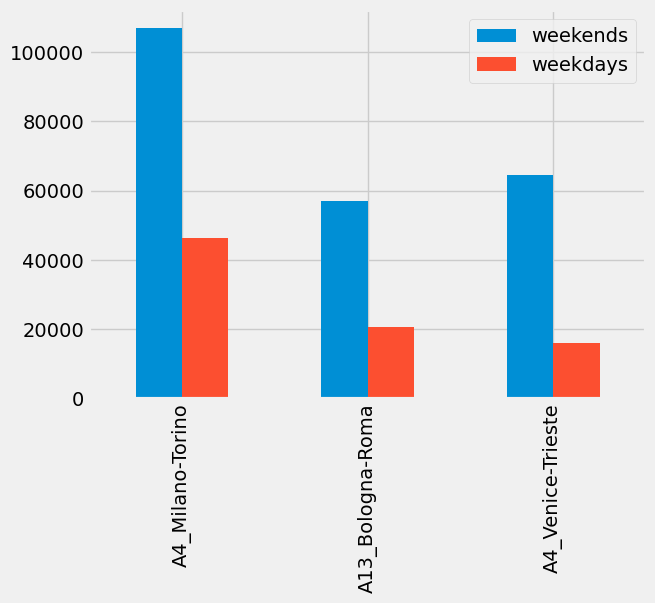

In [67]:
#if 'y' it means weekend if 'n' means weekedays
weekdays_data=[int(data_week(daily_flow['Lombardia'], 'n')), int(data_week(daily_flow['Emilia Romagna'], 'n')), int(data_week(daily_flow['Friuli Venezia Giulia'], 'n'))]
weekend_data=[int(data_week(daily_flow['Lombardia'], 'y')), int(data_week(daily_flow['Emilia Romagna'], 'y')), int(data_week(daily_flow['Friuli Venezia Giulia'], 'y'))]

plotdata = pd.DataFrame({"weekends":weekend_data,"weekdays":weekdays_data}, 
    index=['A4_Milano-Torino', 'A13_Bologna-Roma', 'A4_Venice-Trieste']
)

plotdata.plot(kind="bar")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

-Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of law should be used to describe the distribution.

1.Assuming an analityc form can be used to describe the trend, create a regression to estimate the expected number of visitors by the distance of the province of origin. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

-[OPEN] Use all the data available (and additional data from the ISTAT sources if needed) to extract another interesting information concerning the mobility and the flux of visitors and commuters

get familiar with distriction in Italy:

# **7,918** comuni in Italy

# **925** cities in Italy

# **107** provinces in Italy

# **20** regions in Italy


In [68]:
import pandas as pd

In [70]:
# veneto.txt data has more rows than excel sheet row maximum number
veneto_df=pd.read_csv('datafile/Veneto.txt',sep=';')
comune_df=codici_comune
provincia_df=codici_provincia
natzioni_df=codici_nazioni
day_df=day_od
distinct_users_day_df=distinct_users_day

In [71]:
veneto_df["Origine"] = veneto_df["Origine"].apply(lambda x: float(x.split(',')[0]))
veneto_df["Destinazione"] = veneto_df["Destinazione"].apply(lambda x: float(x.split(',')[0]))
veneto_df["Total_Minu"] = veneto_df["Total_Minu"].apply(lambda x: float(x.split(',')[0]))
veneto_df["Total_Mete"] = veneto_df["Total_Mete"].apply(lambda x: float(x.split(',')[0]))
veneto_df=veneto_df.astype({"Origine":int,"Destinazione":int,"Total_Minu":int,"Total_Mete":int})
veneto_df.head(1)

,Name,Origine,Destinazione,Total_Minu,Total_Mete
0,1042 - 23059,1042,23059,129,243790


In [72]:
comune_df.head(1)

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0


In [73]:
padova_comune=comune_df.loc[comune_df['COMUNE'] == 'Padova']
padova_comune.head()


,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
3554,28,28060,Padova,1


***comune code*** of padova is **28060**

In [74]:
provincia_df.head(1)

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO


In [75]:
natzioni_df.head(1)

,COD_COUNTRY,COUNTRY_NAME_IT
0,212,Monaco


In [76]:
day_df=day_df[day_df['CUST_CLASS']=='visitor']
day_df["PRO_COM"] = day_df["PRO_COM"].apply(lambda x: int(x))
day_df.head(1)

C:\Users\loren\AppData\Local\Temp\ipykernel_27540\4112015972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df["PRO_COM"] = day_df["PRO_COM"].apply(lambda x: int(x))


,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999,493


In [77]:
distinct_users_day_df.head(1)

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968


***what is the code of Veneto provincia?***


In [78]:
padova=provincia_df.loc[provincia_df['PROVINCIA'] == 'Padova']
padova.head()

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
28,5,28,Padova,PD


In [79]:
distance_dict={
    'Origine':[],
    'FLOW':[],
    'Total_Mete':[]
}

distance_to_Padova=veneto_df[veneto_df['Destinazione']==28060]
distance_to_Padova.head()
for index,row in day_df.iterrows():
  if row['PRO_COM']=='NaN':
    continue
  if (int(row['PRO_COM']) == -999) or (int(row['PRO_COM']) == 28060): #last or not needed 
    continue
  distance=distance_to_Padova[distance_to_Padova['Origine']==row['PRO_COM']]
  if len(distance['Total_Mete'].tolist())==0:
    continue
  distance_dict['Origine'].append(row['PRO_COM'])
  distance_dict['FLOW'].append(row['FLOW'])
  distance_dict['Total_Mete'].append(distance['Total_Mete'].tolist()[0])

distance_dataframe=pd.DataFrame.from_dict(distance_dict)

In [80]:
distance_dataframe=distance_dataframe.sort_values(['Total_Mete']).reset_index(drop=True)

In [81]:
distance_dataframe.head()

,Origine,FLOW,Total_Mete
0,28069,39,6378
1,28069,36,6378
2,28069,200,6378
3,28069,88,6378
4,28069,495,6378


In [82]:
new_dict={
    'Origine':[],
    'FLOW':[],
    'Total_Mete':[]
}

for index,row in distance_dataframe.iterrows():
  if row['Origine'] in new_dict['Origine']:
    continue
  mean=distance_dataframe[distance_dataframe['Origine']==row['Origine']]['FLOW'].reset_index(drop=True).mean()
  new_dict['Origine'].append(row['Origine'])
  new_dict['FLOW'].append(mean)
  new_dict['Total_Mete'].append(row['Total_Mete'])

distance_dataframe=pd.DataFrame.from_dict(new_dict)

In [83]:
distance_dataframe.head(10)

,Origine,FLOW,Total_Mete
0,28069,114.410815,6378
1,28058,127.457955,7215
2,28099,116.771803,7307
3,28016,114.392706,7409
4,28100,95.734759,8315
5,28072,95.200828,9262
6,28045,53.939100,9526
7,28003,123.818074,9865
8,28086,99.369505,10099
9,27043,61.792092,10584


<AxesSubplot:title={'center':'Distance vs Number of visitors'}, xlabel='Distance', ylabel='Number of visitors'>

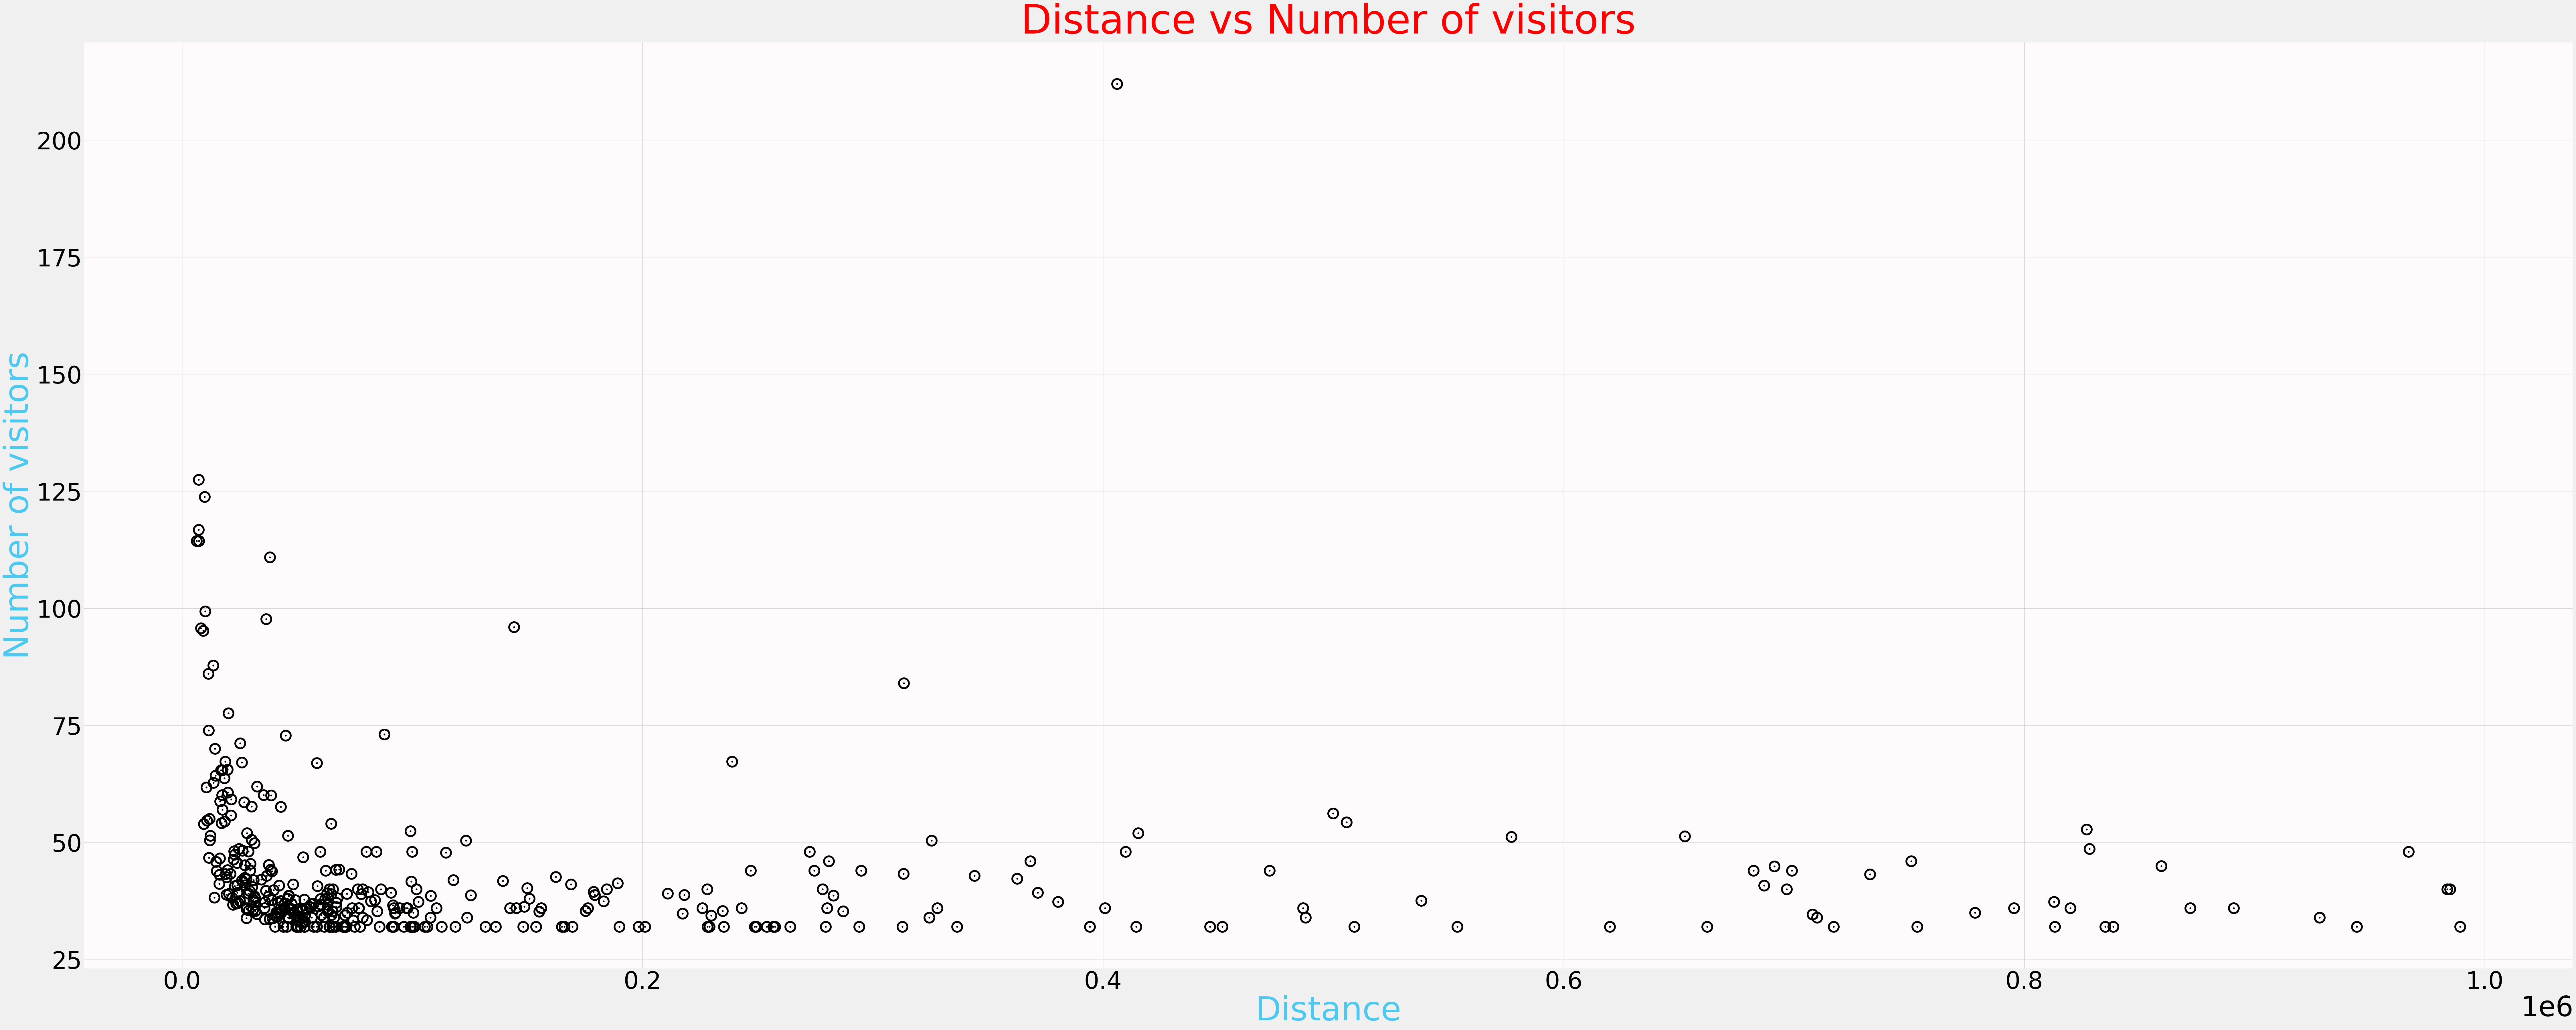

In [84]:
import matplotlib.pyplot as plt
from cycler import cycler

plt.rcParams['font.size'] = 70
plt.rcParams['text.color'] = 'red'
plt.rcParams['axes.labelcolor'] = '#4cc9f0'
plt.rcParams['axes.facecolor'] = '#fffafb'
plt.rcParams['axes.prop_cycle']=cycler('color',['black'])

distance_dataframe.plot(kind='scatter',x='Total_Mete',y='FLOW',figsize=(100,40),fontsize=60,linewidths=25,
                        title='Distance vs Number of visitors',
                        xlabel='Distance',
                        ylabel='Number of visitors')

# Polynomial Regression : 

In [85]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [86]:
X=distance_dataframe['Total_Mete'].to_frame()
y=distance_dataframe['FLOW'].to_frame()

X_seq = np.linspace(X.min(),X.max(),10000000).reshape(-1,1)

In [87]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

C:\Users\loren\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


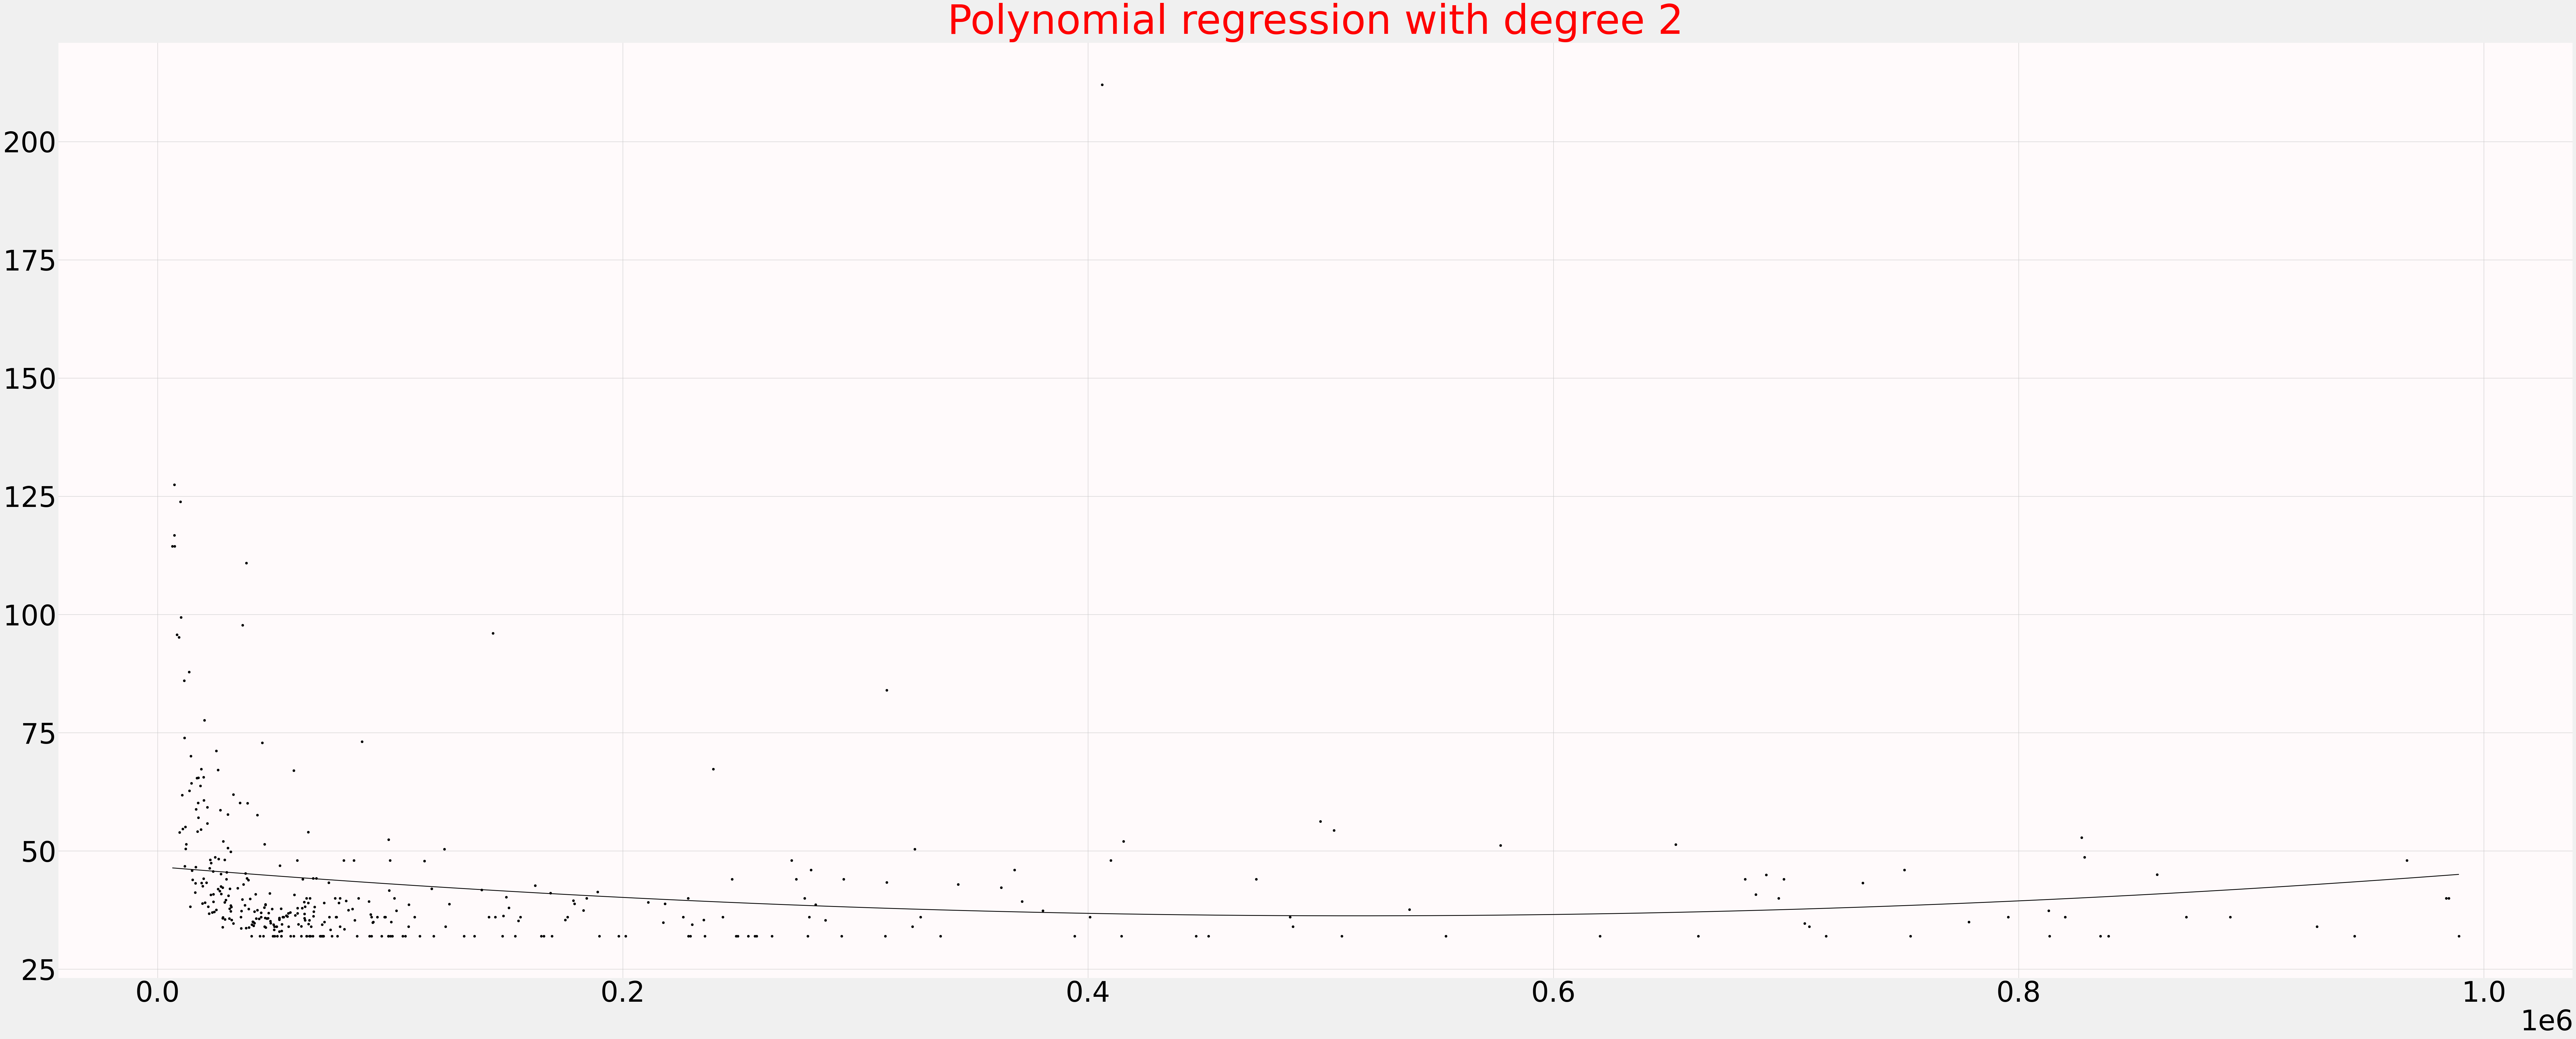

In [88]:
plt.rcParams['font.size'] = 70
plt.rcParams['lines.linewidth']=2
plt.figure(figsize=(100,40))
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [89]:
X=distance_dataframe['Total_Mete'].to_numpy()
y=distance_dataframe['FLOW'].to_numpy()
y_logData=np.log(y)
X_seq = np.linspace(X.min(),X.max(),10000000).reshape(-1,1)

In [90]:
curve=np.polyfit(X,y_logData,1)
print(curve)

[-1.80845335e-07  3.74358732e+00]


In [91]:
y_reg = np.exp(3.74358732e+00) * np.exp(-1.80845335e-07*X)

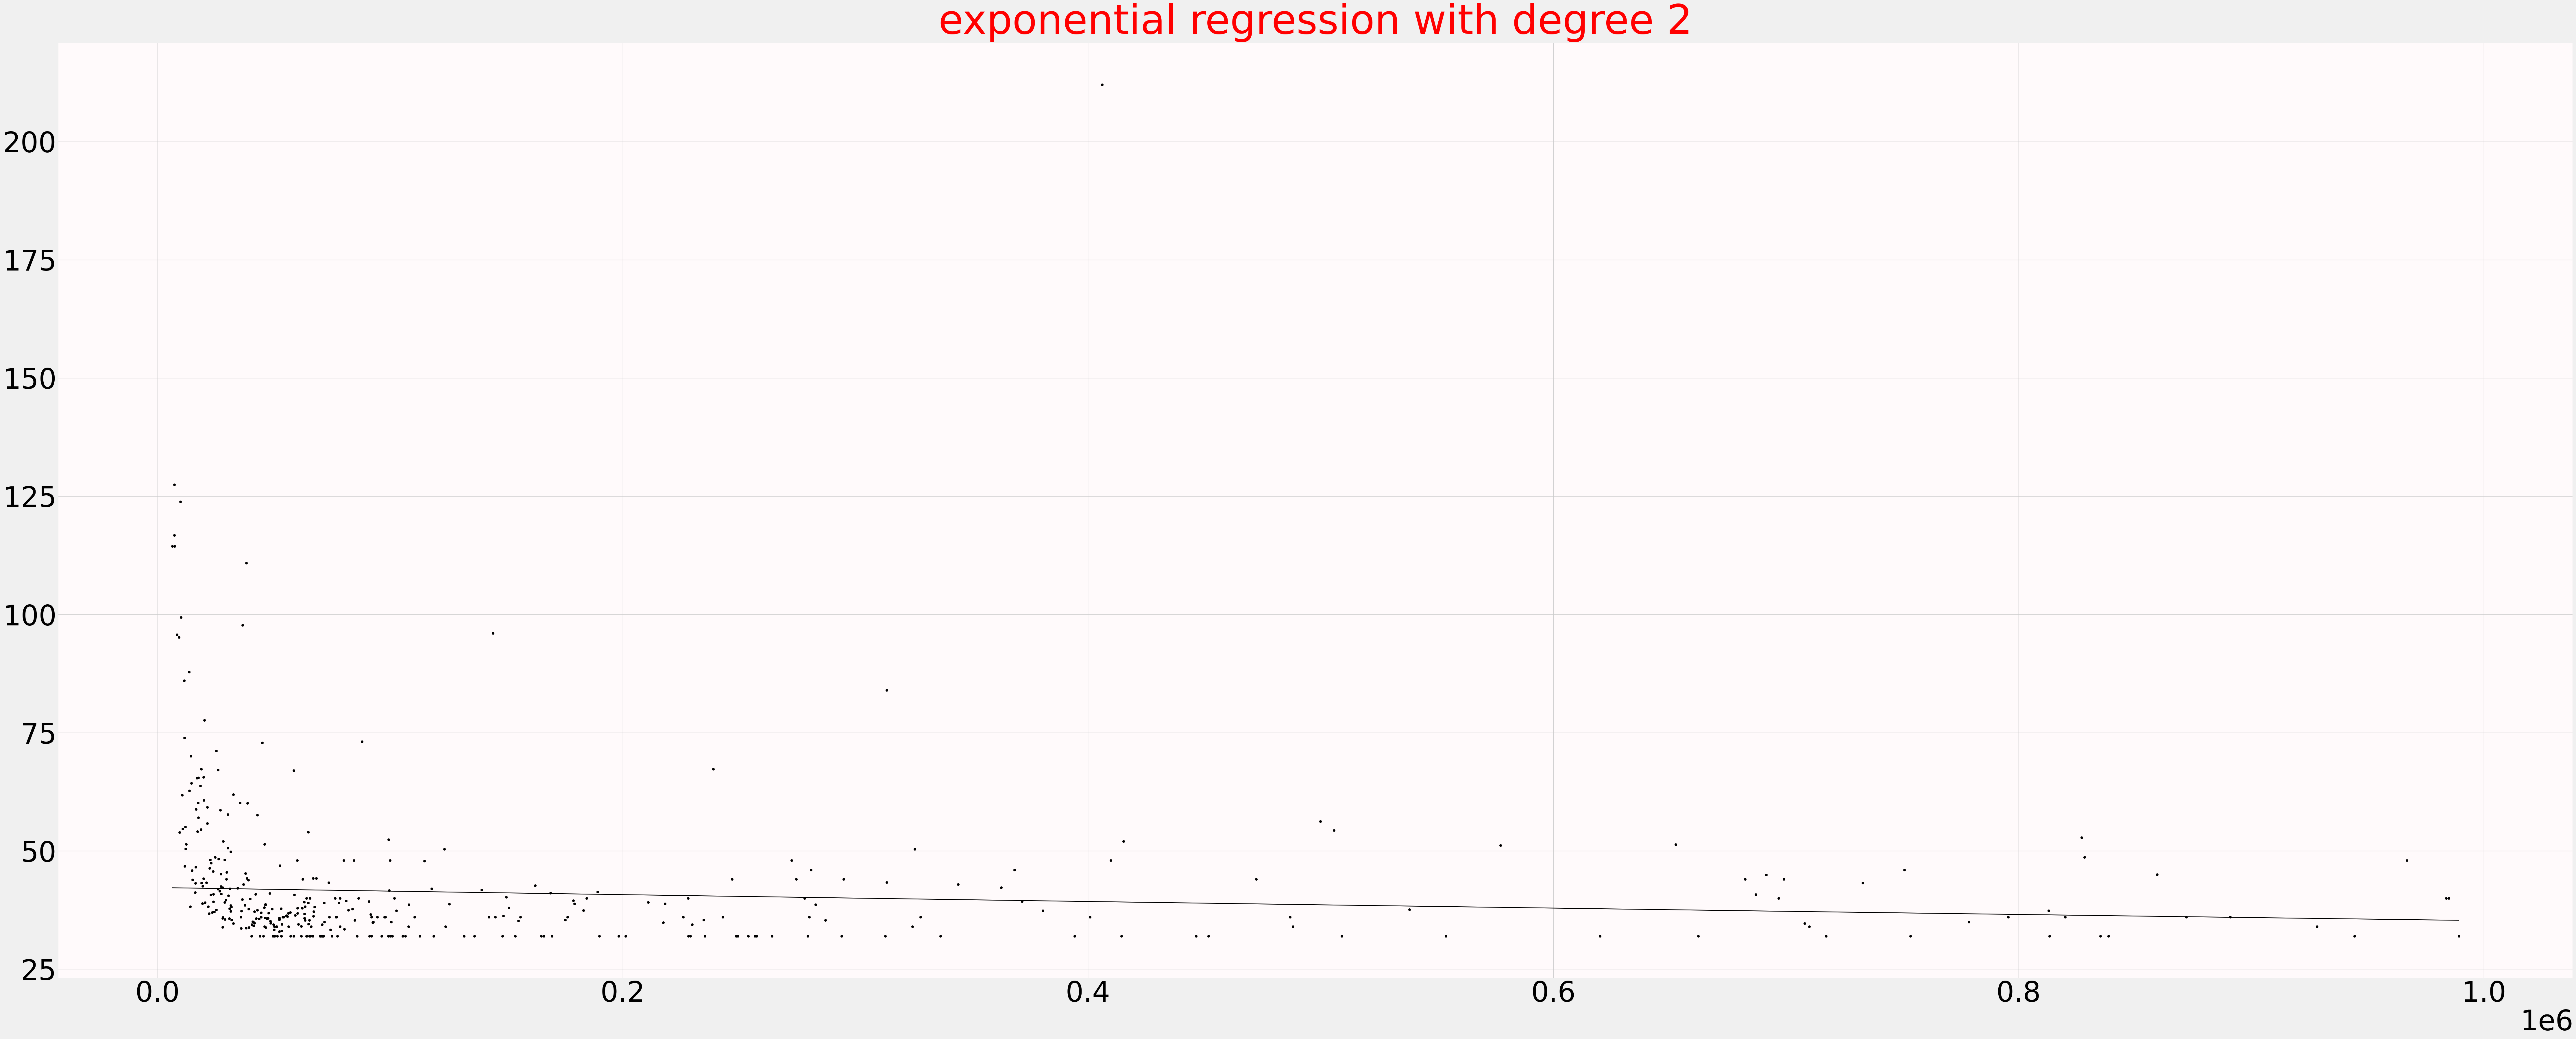

In [92]:
plt.rcParams['font.size'] = 70
plt.rcParams['lines.linewidth']=2
plt.figure(figsize=(100,40))
plt.scatter(X,y)
plt.plot(X,y_reg,color="black")
plt.title("exponential regression with degree "+str(degree))
plt.show()

Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

#find 5 top difference in exp. reg. and poly. reg.

In [93]:
X=distance_dataframe['Total_Mete'].to_frame()
y_poly=polyreg.predict(X)
y_poly=y_poly.reshape((382,))

In [94]:
print(y_poly.shape)

(382,)


In [95]:
defrence_expReg_real=np.abs(np.subtract(y_reg,y))
defrence_poly_real=np.abs(np.subtract(y_poly,y))

In [96]:
print(defrence_poly_real.shape)

(382,)


In [97]:
new_distance_dataframe=pd.concat([distance_dataframe, pd.DataFrame(defrence_expReg_real)], axis=1)

In [98]:
new_distance_dataframe.head()

,Origine,FLOW,Total_Mete,0
0,28069,114.410815,6378,72.210238
1,28058,127.457955,7215,85.263766
2,28099,116.771803,7307,74.578316
3,28016,114.392706,7409,72.199997
4,28100,95.734759,8315,53.548963


In [99]:
new_distance_dataframe.rename(columns = {0:'exp-difference'},inplace = True)

In [100]:
new_distance_dataframe.head()

,Origine,FLOW,Total_Mete,exp-difference
0,28069,114.410815,6378,72.210238
1,28058,127.457955,7215,85.263766
2,28099,116.771803,7307,74.578316
3,28016,114.392706,7409,72.199997
4,28100,95.734759,8315,53.548963


In [101]:
new_distance_dataframe=pd.concat([new_distance_dataframe, pd.DataFrame(defrence_poly_real)], axis=1)

In [102]:
new_distance_dataframe.rename(columns = {0:'poly-difference'},inplace = True)

## New dataframe with differences (exp.reg and poly.reg)

In [103]:
new_distance_dataframe.head()

,Origine,FLOW,Total_Mete,exp-difference,poly-difference
0,28069,114.410815,6378,72.210238,68.006569
1,28058,127.457955,7215,85.263766,81.086980
2,28099,116.771803,7307,74.578316,70.404482
3,28016,114.392706,7409,72.199997,68.029434
4,28100,95.734759,8315,53.548963,49.407427


In [104]:
sorted_on_exp_difference=new_distance_dataframe.sort_values(['exp-difference'],ascending=False).reset_index(drop=True)
sorted_on_poly_difference=new_distance_dataframe.sort_values(['poly-difference'],ascending=False).reset_index(drop=True)

In [105]:
sorted_on_exp_difference.head()

,Origine,FLOW,Total_Mete,exp-difference,poly-difference
0,44066,212.000000,406007,172.741702,175.256454
1,28058,127.457955,7215,85.263766,81.086980
2,28003,123.818074,9865,81.644101,77.552077
3,28099,116.771803,7307,74.578316,70.404482
4,28069,114.410815,6378,72.210238,68.006569


In [106]:
sorted_on_poly_difference.head()

,Origine,FLOW,Total_Mete,exp-difference,poly-difference
0,44066,212.000000,406007,172.741702,175.256454
1,28058,127.457955,7215,85.263766,81.086980
2,28003,123.818074,9865,81.644101,77.552077
3,28099,116.771803,7307,74.578316,70.404482
4,28016,114.392706,7409,72.199997,68.029434


In [107]:
top5_on_exp_difference=sorted_on_exp_difference.loc[:5]
top5_on_poly_difference=sorted_on_poly_difference.loc[:4]

In [108]:
dict_top5_comune_exp_def={
    'name':[]
}
dict_top5_comune_poly_def={
    'name':[]
}

In [109]:
for index, row in top5_on_exp_difference.iterrows():
  d=comune_df.loc[comune_df['PRO_COM'] == row['Origine']]
  dict_top5_comune_exp_def['name'].append(d['COMUNE'].tolist()[0])

dict_top5_comune_exp_def=pd.DataFrame.from_dict(dict_top5_comune_exp_def)

for index, row in top5_on_poly_difference.iterrows():
  d=comune_df.loc[comune_df['PRO_COM'] == row['Origine']]
  dict_top5_comune_poly_def['name'].append(d['COMUNE'].tolist()[0])

dict_top5_comune_poly_def=pd.DataFrame.from_dict(dict_top5_comune_poly_def)

In [110]:
dict_top5_comune_exp_def.head()

,name
0,San Benedetto del Tronto
1,Noventa Padovana
2,Albignasego
3,Vigodarzere
4,Ponte San Nicolò


In [111]:
dict_top5_comune_poly_def.head()

,name
0,San Benedetto del Tronto
1,Noventa Padovana
2,Albignasego
3,Vigodarzere
4,Cadoneghe


In [113]:
geo_df=pd.read_csv('datafile/it.csv',sep=',')
geo_df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Rome,41.8931,12.4828,Italy,IT,Lazio,primary,2872800,2872800
1,Milan,45.4669,9.1900,Italy,IT,Lombardy,admin,1366180,1366180
2,Naples,40.8333,14.2500,Italy,IT,Campania,admin,966144,966144
3,Turin,45.0667,7.7000,Italy,IT,Piedmont,admin,870952,870952
4,Palermo,38.1157,13.3613,Italy,IT,Sicilia,admin,668405,668405


In [114]:
dict_geo_exp_def={
    'name':[],
    'lat':[],
    'lng':[]
}

dict_geo_poly_def={
    'name':[],
    'lat':[],
    'lng':[]
}

for ind, row in dict_top5_comune_exp_def.iterrows():
  search=geo_df[geo_df['city']==row['name']]
  dict_geo_exp_def['name'].append(row['name'])
  dict_geo_exp_def['lat'].append(search['lat'].tolist())
  dict_geo_exp_def['lng'].append(search['lng'].tolist())

dict_geo_exp_def=pd.DataFrame.from_dict(dict_geo_exp_def)

for ind, row in dict_top5_comune_poly_def.iterrows():
  search=geo_df[geo_df['city']==row['name']]
  dict_geo_poly_def['name'].append(row['name'])
  dict_geo_poly_def['lat'].append(search['lat'].tolist())
  dict_geo_poly_def['lng'].append(search['lng'].tolist())

dict_geo_poly_def=pd.DataFrame.from_dict(dict_geo_poly_def)

In [115]:
dict_geo_exp_def.head()

,name,lat,lng
0,San Benedetto del Tronto,[42.9438],[13.8833]
1,Noventa Padovana,[],[]
2,Albignasego,[45.35],[11.8667]
3,Vigodarzere,[45.45],[11.8833]
4,Ponte San Nicolò,[],[]


In [116]:
# Noventa Padovana [45.4150° N, 11.9456° E] not in the data set.
dict_geo_exp_def.iloc[1]['lat']=[45.41]
dict_geo_exp_def.iloc[1]['lng']=[11.9456]

# Ponte San Nicol [45.3694° N, 11.9231° E] not in the data set.
dict_geo_exp_def.iloc[4]['lat']=[45.36]
dict_geo_exp_def.iloc[4]['lng']=[11.9231]


In [117]:
dict_geo_exp_def.head()

,name,lat,lng
0,San Benedetto del Tronto,[42.9438],[13.8833]
1,Noventa Padovana,[45.41],[11.9456]
2,Albignasego,[45.35],[11.8667]
3,Vigodarzere,[45.45],[11.8833]
4,Ponte San Nicolò,[45.36],[11.9231]


In [118]:
dict_geo_poly_def.head()

,name,lat,lng
0,San Benedetto del Tronto,[42.9438],[13.8833]
1,Noventa Padovana,[],[]
2,Albignasego,[45.35],[11.8667]
3,Vigodarzere,[45.45],[11.8833]
4,Cadoneghe,[45.45],[11.9333]


In [119]:
# Noventa Padovana [45.4150° N, 11.9456° E] not in the data set.
dict_geo_poly_def.iloc[1]['lat']=[45.41]
dict_geo_poly_def.iloc[1]['lng']=[11.9456]

In [120]:
dict_geo_poly_def.head()

,name,lat,lng
0,San Benedetto del Tronto,[42.9438],[13.8833]
1,Noventa Padovana,[45.41],[11.9456]
2,Albignasego,[45.35],[11.8667]
3,Vigodarzere,[45.45],[11.8833]
4,Cadoneghe,[45.45],[11.9333]


# Geographical Demonstration : Maps

In [121]:
import folium

In [122]:
#italy_map = folium.Map(location=[42.5, 13], zoom_start=6)
#italy_map

In [123]:
italy_map_exp = folium.Map(location=[45.40, 11.87], zoom_start=10)

incidents_exp = folium.map.FeatureGroup()

for ind,row in  dict_geo_exp_def.iterrows():
  incidents_exp.add_child(
      folium.CircleMarker(
            [row['lat'][0],row['lng'][0]],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6))
  
  folium.Marker([row['lat'][0],row['lng'][0]], popup=row['name']).add_to(italy_map_exp)


loc = 'top 5 location with most visitors than exponential regression expectation'
title_html = '''
             <h3 align="center" style="font-size:16px;color:'#14213d'">{}</h3>
             '''.format(loc)         
italy_map_exp.get_root().html.add_child(folium.Element(title_html))
italy_map_exp.add_child(incidents_exp)
italy_map_exp

In [124]:
italy_map_poly = folium.Map(location=[44.40, 11.87], zoom_start=7)

incidents_poly = folium.map.FeatureGroup()

for index,row in dict_geo_poly_def.iterrows():
  incidents_poly.add_child(
      folium.CircleMarker(
            [row['lat'][0],row['lng'][0]],
            radius=10, # define how big you want the circle markers to be
            color='#6a040f',
            fill=True,
            fill_color='#6a040f',
            fill_opacity=0.6))
  folium.Marker([row['lat'][0],row['lng'][0]], popup=row['name']).add_to(italy_map_poly)

loc = 'top 5 location with most visitors than polynomial regression expectation'
title_html = '''
             <h3 align="center" style="font-size:16px;color:'#14213d'">{}</h3>
             '''.format(loc)         
italy_map_poly.get_root().html.add_child(folium.Element(title_html))
italy_map_poly.add_child(incidents_poly)
italy_map_poly